In [1]:
globals().clear
import time
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from datetime import datetime
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 500

In [2]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

import tensorflow       as tf
import keras.optimizers as op
from tensorflow                     import keras
from tensorflow.keras.models        import Sequential
from tensorflow.keras.layers        import Dense
from tensorflow.keras.layers        import Dropout
from tensorflow.keras.optimizers    import Adam

In [4]:
# Load dataset
df = pd.read_excel('merged_onehot_test.xlsx')

In [5]:
t1=df
t1.index=t1['Date']
t1.drop(columns=t1.columns[0:2], 
        axis=1, 
        inplace=True)
t1.head()

,TSLA_close,TSLA_vol_4_ave,TSLA_vwap_4_ave,TSLA_trans_4_ave,nasx_close_-1,dow_close_-1,dow_volume_-1,inx_close_-1,inx_volume_-1,tenbond_close_-1,fivbond_close_-1,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,day_01,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Timeslot,week_label
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-01 10:30:00,176.600,6531560.00,174.371825,29927.25,9526.87,25436.04,16068213,3050.03,108060941,0.68,0.32,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1
2020-06-01 10:45:00,176.748,4872685.00,175.236475,22062.00,9535.28,25473.21,12068894,3052.49,89776363,0.68,0.31,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1
2020-06-01 11:00:00,176.560,3717613.75,175.730850,17452.00,9532.38,25440.58,13973570,3050.69,94103383,0.68,0.31,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,1
2020-06-01 11:15:00,175.474,2821491.25,175.958200,13504.00,9521.55,25408.86,13146463,3047.05,101791629,0.68,0.31,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8,1
2020-06-01 11:30:00,175.400,2607445.00,176.151450,12176.75,9512.11,25393.88,14378695,3045.30,83256033,0.68,0.31,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9,1


In [6]:
train_df = t1.loc['2020-06-01 10:30:00':'2021-12-31 16:00:00']
test_df = t1.loc['2022-01-01 09:30:00':'2022-05-27 16:00:00']

In [7]:
import time

In [34]:
start = time.time()
predictions = list()
a=1
count_time=list()
scale_X = MinMaxScaler()
                                                           

for i in test_df['week_label'].unique():

    test_subset = test_df[test_df['week_label']==i]
    print(train_df.index[0])
    print(train_df.index[-1])
    print(test_subset.index[0])
    print(test_subset.index[-1])
    train_stand = train_df.copy()
    test_stand = test_subset.copy()

    st = time.time()

  
    X_train, y_train = train_stand.iloc[:,2:65], train_stand.iloc[:,0]
    X_train = scale_X.fit_transform(X_train)
    X_test, y_test = test_stand.iloc[:,2:65], test_stand.iloc[:,0]
    X_test = scale_X.transform(X_test)    

    model = Sequential()
    model.add(Dense(50, activation = 'relu', input_dim = df.iloc[:,2:65].shape[1]))
    model.add(Dropout(0.25))                                                         
    model.add(Dense(1))
    opt = Adam(amsgrad = True, learning_rate= 0.001, beta_1 = 0.79, beta_2 = 0.999)     
    model.compile(loss = 'mse', optimizer = opt) 
    model.fit(X_train, y_train,epochs=30)   
    y_hat = model.predict(X_test, verbose=False)
    predictions.append(y_hat)
    et = time.time()
    used_time=et-st
    count_time.append(used_time)
      
    train_df = train_df.append(test_df[test_df['week_label']==i])
    train_df=train_df.drop(train_df[train_df['week_label']==a].index)
    a+=1


    print(train_df.index[0])
    print(train_df.index[-1])
    print('Time taken:'+str(used_time))
    print('---------------------------')
    
end = time.time()
print("total used time"+str(end-start))

2020-10-26 09:30:00
2022-05-27 16:00:00
2022-01-03 09:30:00
2022-01-07 16:00:00
Epoch 1/30
829/829 [==============================] - 2s 2ms/step - loss: 526164.4375
Epoch 2/30
829/829 [==============================] - 1s 1ms/step - loss: 57791.2930
Epoch 3/30
829/829 [==============================] - 1s 1ms/step - loss: 14224.5889
Epoch 4/30
829/829 [==============================] - 1s 1ms/step - loss: 12184.9072
Epoch 5/30
829/829 [==============================] - 1s 2ms/step - loss: 11278.4580
Epoch 6/30
829/829 [==============================] - 1s 2ms/step - loss: 10526.7480
Epoch 7/30
829/829 [==============================] - 1s 2ms/step - loss: 9896.8467
Epoch 8/30
829/829 [==============================] - 1s 1ms/step - loss: 9644.3398
Epoch 9/30
829/829 [==============================] - 1s 2ms/step - loss: 9598.4531
Epoch 10/30
829/829 [==============================] - 1s 1ms/step - loss: 9505.4893
Epoch 11/30
829/829 [==============================] - 1s 1ms/step - los

In [35]:
df_expe = pd.DataFrame(test_df.iloc[:,0])
pred_list= list()
for i in range(len(predictions)):
  pred_list=pred_list+predictions[i].tolist()

 
df_pred = pd.DataFrame(pred_list,index=test_df.index,columns= ['predict'])

df_Result = pd.concat([df_expe,df_pred],axis=1)

df_Result

,TSLA_close,predict
Date,,
2022-01-03 09:30:00,1165.1980,1093.236450
2022-01-03 09:45:00,1149.0000,1121.901367
2022-01-03 10:00:00,1156.5900,1123.276245
2022-01-03 10:15:00,1152.0050,1135.742676
2022-01-03 10:30:00,1153.2900,1145.936523
2022-01-03 10:45:00,1168.3000,1135.692505
2022-01-03 11:00:00,1169.3000,1129.439575
2022-01-03 11:15:00,1165.8360,1131.368896
2022-01-03 11:30:00,1163.5650,1135.853882


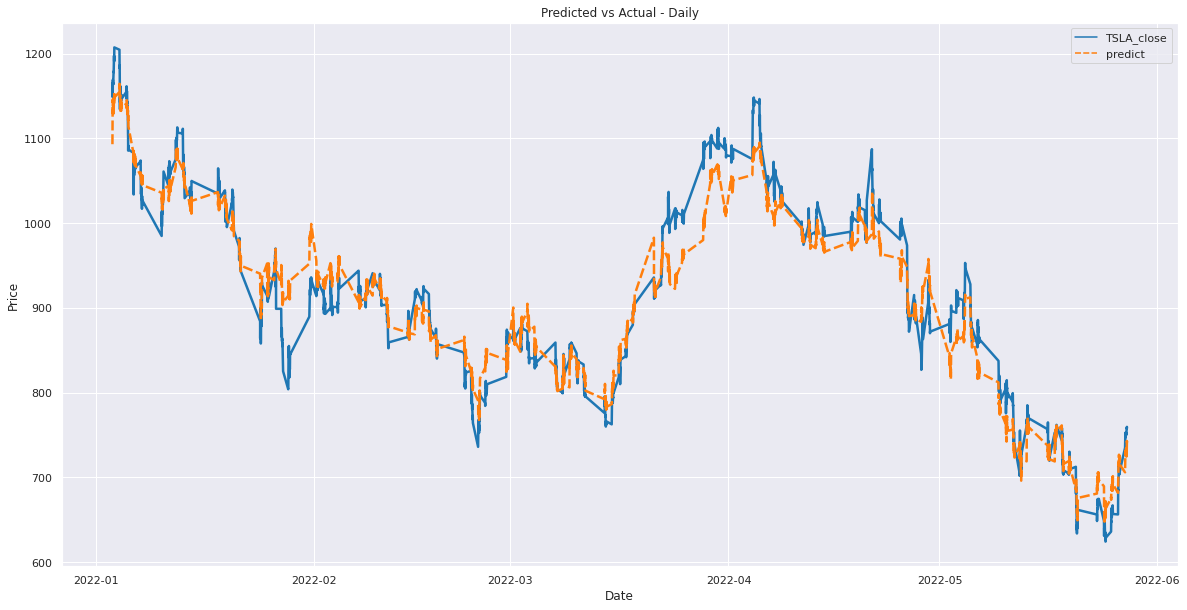

In [36]:
plt.figure(figsize=(20,10))
linep = sns.lineplot(data=df_Result, palette="tab10", linewidth=2.5)
linep.set(xlabel='Date', ylabel='Price', title='Predicted vs Actual - Daily')
plt.show()

In [37]:
#Ref: https://stackoverflow.com/questions/47648133/mape-calculation-in-python
#define function to calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
#Ref: https://stackoverflow.com/questions/47648133/mape-calculation-in-python
#define function to calculate the MPE
def mean_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100

In [39]:
mean_absolute_percentage_error(df_Result['TSLA_close'],df_Result['predict'])

2.5506601922761543

In [40]:
mean_percentage_error(df_Result['TSLA_close'],df_Result['predict'])

0.33655272350660986

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_Result['TSLA_close'],df_Result['predict'],squared=False)

30.551601929267274

In [42]:
np.mean(count_time)

63.67746765272958